In [1]:
# Importamos las principales librerías
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

df=pd.read_csv('Datos_final.csv')

In [2]:
#Visualizamos los datos en la variable df
df.head()

,GDP,HOUS_SAV,GDP_ID,TAX_REV,TAX_INC,SOC_CON,POP_TER,COST_STARTUP,ADJ_NET_INC,UNEMPLOY,TEA,TEAF
0,41723.84483,1.500000,1.200000,34.401,7.617,11.643,44.250000,3.9,23216.4,14.10602,6.15,0.94
1,40542.18459,1.517564,1.243228,34.401,7.617,11.643,44.259609,4.0,23216.4,15.25788,6.39,0.89
2,39626.84667,1.150234,1.210406,33.683,7.343,11.455,42.644691,4.3,23216.4,17.22489,6.19,0.82
3,37309.86592,2.827930,1.190476,33.290,7.109,11.284,40.980919,4.3,22018.8,19.63388,5.23,0.81
4,34938.58146,3.032658,1.222357,33.627,7.181,11.270,40.959778,4.4,21307.2,22.05655,5.70,0.79


In [3]:
#Transformamos variables
dataset = df.values
X = dataset[:,0:10]

In [4]:
#Visualizamos el contenido del array X
X

array([[4.17238448e+04, 1.50000000e+00, 1.20000000e+00, ...,
        3.90000000e+00, 2.32164000e+04, 1.41060200e+01],
       [4.05421846e+04, 1.51756392e+00, 1.24322800e+00, ...,
        4.00000000e+00, 2.32164000e+04, 1.52578800e+01],
       [3.96268467e+04, 1.15023443e+00, 1.21040627e+00, ...,
        4.30000000e+00, 2.32164000e+04, 1.72248900e+01],
       ...,
       [3.40290852e+04, 3.61886358e+00, 3.38082831e+00, ...,
        7.00000000e-01, 3.69751934e+04, 7.47581500e+00],
       [3.36090013e+04, 4.28163457e+00, 3.38319459e+00, ...,
        7.00000000e-01, 3.61153593e+04, 6.52563600e+00],
       [3.15836386e+04, 5.56639054e+00, 3.60175642e+00, ...,
        7.00000000e-01, 3.17956718e+04, 5.67746200e+00]])

In [5]:
#Formamos variable dependiente, por tanto, la Y. Esta se hará corresponder con la variable TEA de los datos cargados
Y = dataset[:,10]

In [6]:
#Visualizamos el contenido de la variable Y
Y

array([ 6.15,  6.39,  6.19,  5.23,  5.7 ,  5.47,  5.21,  5.7 ,  5.81,
        4.31,  5.1 ,  7.03,  7.62,  7.27,  5.65,  5.15,  6.65,  4.59,
        6.32,  2.79,  4.18,  4.28,  4.42,  4.87,  4.42,  3.43,  4.32,
        2.35,  2.35,  3.72,  4.62,  5.01,  3.47,  4.94,  4.32,  3.11,
        5.74,  9.11, 12.89,  8.15,  8.15,  8.15,  9.49,  9.97,  8.25,
        7.67,  7.54,  4.4 ,  8.78,  8.78,  8.78,  3.85,  3.85,  3.85,
        6.61,  6.61,  6.61, 12.41,  9.64,  8.93, 10.88,  9.33,  6.53,
        9.25,  6.15,  7.25,  6.76,  7.59,  7.59,  8.22,  7.35,  9.83,
        7.7 ,  8.1 ,  9.14, 11.37,  7.63,  4.97,  5.28,  4.56,  4.7 ,
        5.27,  4.98,  5.34,  5.62,  4.17,  4.1 ,  3.77,  4.21,  4.21,
        5.09,  4.4 ,  5.22,  5.16,  6.28,  6.13,  6.13,  3.92,  5.32,
        5.34,  5.34,  4.57,  5.17,  5.73,  5.83,  4.35,  5.64,  3.17,
        4.39,  5.35,  6.03,  1.63, 17.42, 15.59, 13.64, 12.63, 11.88,
       13.81, 12.73, 12.84, 12.34,  7.59,  7.96, 10.76,  9.61, 10.03,
       12.44, 11.27,

In [7]:
#Importamos las librerías para poder aplicar preprocesamiento de los datos
from sklearn import datasets
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

In [8]:
#Se aplica la transformación de los datos
X_scale = data_scaler.fit_transform(X)
Y_scale = target_scaler.fit_transform(Y.reshape(-1, 1))

In [9]:
#Se divide el conjunto de datos entre datos de test y datos de entrenamiento para las variables X e Y

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X_scale, Y_scale, test_size = 0.3)



#Converting the data to the numpy array as it is expected by our RNN model

X_train=np.array(X_train)

Y_train=np.array(Y_train)    



In [10]:
#Se aplica reshaping a las variables

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [11]:
#Se visualiza el reshape de las variables
X_train.shape[1]

10

In [12]:
# A partir de aquí se comienza a construir el modelo
#En primer se importan las librerías que harán falta para construir las capas, en sus diferentes niveles 
    


from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout



#Se inicializa el modelo

model=Sequential()



#Se construye el primer nivel o capa

model.add(LSTM(units=80, activation='relu', return_sequences=True,input_shape=(X_train.shape[1],1)))

model.add(Dropout(0.2))

#Se construye el segundo nivel o capa

model.add(LSTM(units=80, activation='relu', return_sequences=True))

model.add(Dropout(0.2))

#Se construye el tercer nivel o capa

model.add(LSTM(units=80, activation='relu', return_sequences=True))

model.add(Dropout(0.2))

#Se construye el cuarto nivel o capa

model.add(LSTM(units=80, activation='relu', return_sequences=False))

model.add(Dropout(0.2))


#Se define el nivel o capa de salida

model.add(Dense(1))


model.summary()
#Se procede a compilar el modelo

#model.compile(optimizer='adam',loss='mean_squared_error')

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])



Using TensorFlow backend.
C:\Users\MercedesBarrachinaFe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MercedesBarrachinaFe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MercedesBarrachinaFe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MercedesBarrachinaFe\Anaco

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 80)            26240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 80)            51520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 80)            51520     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 80)            0         
________________________________________________

In [13]:
#Se aplica fitting del modelo sobre el conjunto de datos

# hist=model.fit(X_train,Y_train,epochs=500,batch_size=4)
from keras.callbacks import ModelCheckpoint
from datetime import datetime
import h5py
cur_date_time = datetime.strftime(datetime.now(), '%Y%m%d-%H-%M')
model_weight_name = 'model-(relu)-' + str(cur_date_time) + '-' + 'epoch={epoch:02d}-val_loss={val_loss:.6f}.hdf5'
checkpoint = ModelCheckpoint(model_weight_name, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
#set early stopping monitor so the model stops training when it won't improve anymore
# early_stopping_monitor = EarlyStopping(patience=5)
#train model
H = model.fit(X_train, Y_train, validation_split=0.2, epochs=500, callbacks=[checkpoint], batch_size=4)



Instructions for updating:
Use tf.cast instead.
Train on 177 samples, validate on 45 samples
Epoch 1/500
177/177 [==============================] - 5s 27ms/step - loss: 0.0572 - accuracy: 0.0056 - val_loss: 0.0158 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.01576, saving model to model-(relu)-20200504-18-48-epoch=01-val_loss=0.015759.hdf5
Epoch 2/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0408 - accuracy: 0.0056 - val_loss: 0.0151 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 0.01576 to 0.01512, saving model to model-(relu)-20200504-18-48-epoch=02-val_loss=0.015125.hdf5
Epoch 3/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0385 - accuracy: 0.0056 - val_loss: 0.0142 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 0.01512 to 0.01424, saving model to model-(relu)-20200504-18-48-epoch=03-val_loss=0.014245.hdf5
Epoch 4/500
177/177 [==============================] - 1s 6ms/step - l

177/177 [==============================] - 1s 7ms/step - loss: 0.0216 - accuracy: 0.0056 - val_loss: 0.0207 - val_accuracy: 0.0000e+00

Epoch 00037: val_loss did not improve from 0.01296
Epoch 38/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0283 - accuracy: 0.0056 - val_loss: 0.0131 - val_accuracy: 0.0000e+00

Epoch 00038: val_loss did not improve from 0.01296
Epoch 39/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0228 - accuracy: 0.0056 - val_loss: 0.0105 - val_accuracy: 0.0000e+00

Epoch 00039: val_loss improved from 0.01296 to 0.01054, saving model to model-(relu)-20200504-18-48-epoch=39-val_loss=0.010537.hdf5
Epoch 40/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0217 - accuracy: 0.0056 - val_loss: 0.0118 - val_accuracy: 0.0000e+00

Epoch 00040: val_loss did not improve from 0.01054
Epoch 41/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0213 - accuracy: 0.0056 - val_loss: 0.0174 - val_accur

177/177 [==============================] - 1s 8ms/step - loss: 0.0184 - accuracy: 0.0056 - val_loss: 0.0126 - val_accuracy: 0.0000e+00

Epoch 00117: val_loss did not improve from 0.01006
Epoch 118/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0169 - accuracy: 0.0056 - val_loss: 0.0146 - val_accuracy: 0.0000e+00

Epoch 00118: val_loss did not improve from 0.01006
Epoch 119/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0169 - accuracy: 0.0056 - val_loss: 0.0157 - val_accuracy: 0.0000e+00

Epoch 00119: val_loss did not improve from 0.01006
Epoch 120/500
177/177 [==============================] - 2s 9ms/step - loss: 0.0172 - accuracy: 0.0056 - val_loss: 0.0124 - val_accuracy: 0.0000e+00

Epoch 00120: val_loss did not improve from 0.01006
Epoch 121/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0158 - accuracy: 0.0056 - val_loss: 0.0127 - val_accuracy: 0.0000e+00

Epoch 00121: val_loss did not improve from 0.01006
Epoch 122

177/177 [==============================] - 1s 8ms/step - loss: 0.0165 - accuracy: 0.0056 - val_loss: 0.0154 - val_accuracy: 0.0000e+00

Epoch 00158: val_loss did not improve from 0.01006
Epoch 159/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0176 - accuracy: 0.0056 - val_loss: 0.0126 - val_accuracy: 0.0000e+00

Epoch 00159: val_loss did not improve from 0.01006
Epoch 160/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0207 - accuracy: 0.0056 - val_loss: 0.0173 - val_accuracy: 0.0000e+00

Epoch 00160: val_loss did not improve from 0.01006
Epoch 161/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0153 - accuracy: 0.0056 - val_loss: 0.0162 - val_accuracy: 0.0000e+00

Epoch 00161: val_loss did not improve from 0.01006
Epoch 162/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0138 - accuracy: 0.0056 - val_loss: 0.0136 - val_accuracy: 0.0000e+00

Epoch 00162: val_loss did not improve from 0.01006
Epoch 163

177/177 [==============================] - 1s 6ms/step - loss: 0.0107 - accuracy: 0.0113 - val_loss: 0.0148 - val_accuracy: 0.0000e+00

Epoch 00199: val_loss did not improve from 0.01006
Epoch 200/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 0.0113 - val_loss: 0.0113 - val_accuracy: 0.0000e+00

Epoch 00200: val_loss did not improve from 0.01006
Epoch 201/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0105 - accuracy: 0.0113 - val_loss: 0.0156 - val_accuracy: 0.0000e+00

Epoch 00201: val_loss did not improve from 0.01006
Epoch 202/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0101 - accuracy: 0.0113 - val_loss: 0.0178 - val_accuracy: 0.0000e+00

Epoch 00202: val_loss did not improve from 0.01006
Epoch 203/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0130 - accuracy: 0.0056 - val_loss: 0.0131 - val_accuracy: 0.0000e+00

Epoch 00203: val_loss did not improve from 0.01006
Epoch 204

177/177 [==============================] - 1s 7ms/step - loss: 0.0087 - accuracy: 0.0113 - val_loss: 0.0125 - val_accuracy: 0.0000e+00

Epoch 00240: val_loss did not improve from 0.01006
Epoch 241/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0099 - accuracy: 0.0113 - val_loss: 0.0155 - val_accuracy: 0.0000e+00

Epoch 00241: val_loss did not improve from 0.01006
Epoch 242/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0074 - accuracy: 0.0113 - val_loss: 0.0129 - val_accuracy: 0.0000e+00

Epoch 00242: val_loss did not improve from 0.01006
Epoch 243/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0123 - accuracy: 0.0056 - val_loss: 0.0152 - val_accuracy: 0.0000e+00

Epoch 00243: val_loss did not improve from 0.01006
Epoch 244/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0129 - accuracy: 0.0113 - val_loss: 0.0131 - val_accuracy: 0.0000e+00

Epoch 00244: val_loss did not improve from 0.01006
Epoch 245

177/177 [==============================] - 1s 7ms/step - loss: 0.0105 - accuracy: 0.0113 - val_loss: 0.0131 - val_accuracy: 0.0000e+00

Epoch 00281: val_loss did not improve from 0.01006
Epoch 282/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0096 - accuracy: 0.0056 - val_loss: 0.0182 - val_accuracy: 0.0000e+00

Epoch 00282: val_loss did not improve from 0.01006
Epoch 283/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0104 - accuracy: 0.0113 - val_loss: 0.0125 - val_accuracy: 0.0000e+00

Epoch 00283: val_loss did not improve from 0.01006
Epoch 284/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0098 - accuracy: 0.0113 - val_loss: 0.0123 - val_accuracy: 0.0000e+00

Epoch 00284: val_loss did not improve from 0.01006
Epoch 285/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0114 - accuracy: 0.0113 - val_loss: 0.0135 - val_accuracy: 0.0000e+00

Epoch 00285: val_loss did not improve from 0.01006
Epoch 286

Epoch 322/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0079 - accuracy: 0.0113 - val_loss: 0.0108 - val_accuracy: 0.0000e+00

Epoch 00322: val_loss did not improve from 0.00970
Epoch 323/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0090 - accuracy: 0.0113 - val_loss: 0.0100 - val_accuracy: 0.0000e+00

Epoch 00323: val_loss did not improve from 0.00970
Epoch 324/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0077 - accuracy: 0.0113 - val_loss: 0.0123 - val_accuracy: 0.0000e+00

Epoch 00324: val_loss did not improve from 0.00970
Epoch 325/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0069 - accuracy: 0.0113 - val_loss: 0.0113 - val_accuracy: 0.0000e+00

Epoch 00325: val_loss did not improve from 0.00970
Epoch 326/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0087 - accuracy: 0.0113 - val_loss: 0.0144 - val_accuracy: 0.0000e+00

Epoch 00326: val_loss did not improve from 0.0

177/177 [==============================] - 1s 6ms/step - loss: 0.0134 - accuracy: 0.0056 - val_loss: 0.0124 - val_accuracy: 0.0000e+00

Epoch 00363: val_loss did not improve from 0.00970
Epoch 364/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0096 - accuracy: 0.0113 - val_loss: 0.0132 - val_accuracy: 0.0000e+00

Epoch 00364: val_loss did not improve from 0.00970
Epoch 365/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0078 - accuracy: 0.0113 - val_loss: 0.0126 - val_accuracy: 0.0000e+00

Epoch 00365: val_loss did not improve from 0.00970
Epoch 366/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0083 - accuracy: 0.0113 - val_loss: 0.0117 - val_accuracy: 0.0000e+00

Epoch 00366: val_loss did not improve from 0.00970
Epoch 367/500
177/177 [==============================] - 1s 6ms/step - loss: 0.0096 - accuracy: 0.0113 - val_loss: 0.0139 - val_accuracy: 0.0000e+00

Epoch 00367: val_loss did not improve from 0.00970
Epoch 368


Epoch 00442: val_loss did not improve from 0.00901
Epoch 443/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0075 - accuracy: 0.0113 - val_loss: 0.0106 - val_accuracy: 0.0000e+00

Epoch 00443: val_loss did not improve from 0.00901
Epoch 444/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0082 - accuracy: 0.0113 - val_loss: 0.0111 - val_accuracy: 0.0000e+00

Epoch 00444: val_loss did not improve from 0.00901
Epoch 445/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0074 - accuracy: 0.0113 - val_loss: 0.0098 - val_accuracy: 0.0000e+00

Epoch 00445: val_loss did not improve from 0.00901
Epoch 446/500
177/177 [==============================] - 1s 8ms/step - loss: 0.0067 - accuracy: 0.0113 - val_loss: 0.0099 - val_accuracy: 0.0000e+00

Epoch 00446: val_loss did not improve from 0.00901
Epoch 447/500
177/177 [==============================] - 1s 7ms/step - loss: 0.0068 - accuracy: 0.0113 - val_loss: 0.0102 - val_accuracy: 0.0000

In [14]:
#Se consiguen los valores de test

X_test=np.array(X_test)

X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)



In [15]:
#Se hacen las predicciones

predictions=model.predict(X_test)

predictions=target_scaler.inverse_transform(predictions)

In [16]:
#Se visualiza las prediciones para observar que los valores tienen sentido
predictions

array([[17.75331  ],
       [ 4.301927 ],
       [ 6.0774903],
       [ 5.8202386],
       [ 4.451985 ],
       [ 4.9635158],
       [ 5.46224  ],
       [ 3.9418497],
       [ 5.556    ],
       [13.955003 ],
       [ 4.2674117],
       [ 7.883467 ],
       [ 4.4690533],
       [ 5.0503902],
       [ 8.1471195],
       [ 4.890543 ],
       [10.34457  ],
       [ 6.865136 ],
       [ 5.148138 ],
       [ 4.705409 ],
       [ 5.366949 ],
       [ 4.1022863],
       [ 6.9925537],
       [ 4.1141834],
       [11.630748 ],
       [ 6.5964255],
       [ 4.8165183],
       [ 4.844099 ],
       [ 5.4864593],
       [16.996195 ],
       [15.410508 ],
       [12.266825 ],
       [14.132331 ],
       [ 4.9204397],
       [ 5.5620174],
       [11.501525 ],
       [ 4.325206 ],
       [ 4.37866  ],
       [ 7.093526 ],
       [ 7.254048 ],
       [ 6.631414 ],
       [ 5.993081 ],
       [ 5.447767 ],
       [ 6.4806232],
       [ 5.3918285],
       [ 9.077746 ],
       [11.653786 ],
       [ 6.35

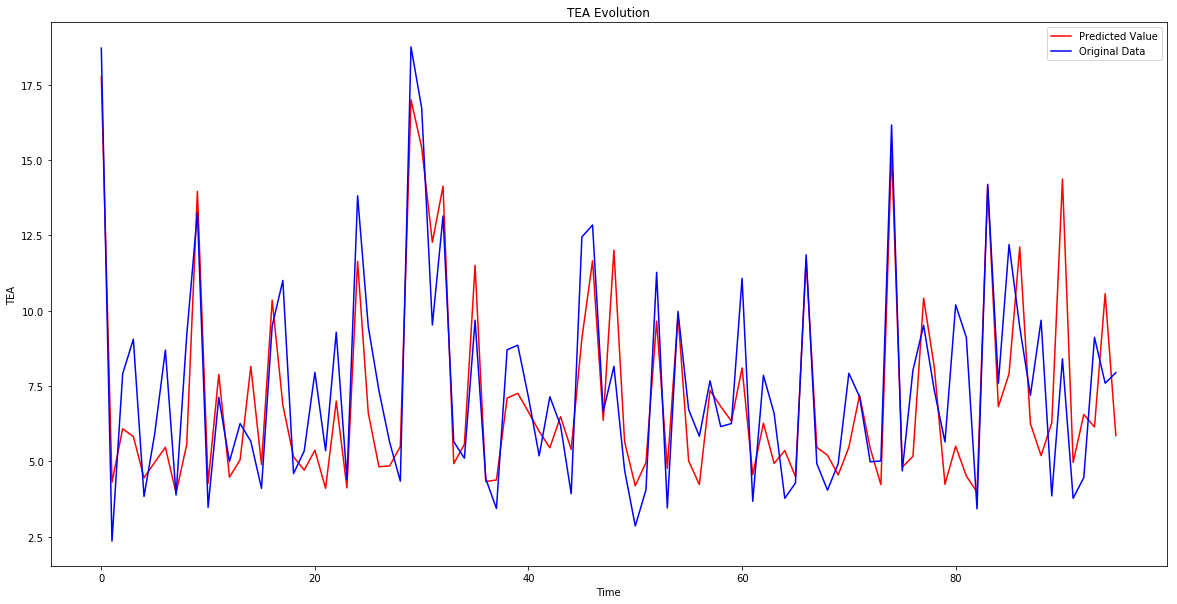

In [17]:
#A partir de aquí se usa una función básico para poder visualizar los resultados obtenidos 

plt.figure(figsize=(20,10))
plt.plot(predictions,color='red',label='Predicted Value')

plt.plot(target_scaler.inverse_transform(Y_test),color='blue',label='Original Data')

plt.title('TEA Evolution')

plt.xlabel('Time')

plt.ylabel('TEA')

plt.legend()

plt.show()



In [18]:
#Visualizr el error entre los datos originales y las predicciones 
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(target_scaler.inverse_transform(Y_test), predictions))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 1.98 RMSE


In [19]:
array=target_scaler.inverse_transform(Y_test)- predictions

In [20]:
#Calcular el MAE
MAE_Error = np.mean(np.abs(target_scaler.inverse_transform(Y_test) - predictions))

In [21]:
MAE_Error

1.546331942776839

In [22]:
#A partir de aquí se analizarán los efectos perturbadores
from sklearn.metrics import mean_squared_error
#print(np.std(X_test, axis=0))
importance_features = []
for i in range(10):  # iterate over the 9 features
    new_x = X_test.copy()
    # generate normal distributed random error by using sigma of each features 
    # we should see std value of each feature by using np.std(X_test, axis=0)[i]
    np.random.seed(42)
    perturbation = np.random.normal(0.0, np.std(X_test, axis=0)[i], size=new_x.shape[0])
    # reshape (98,) to (98,1)
    perturbation = perturbation.reshape(new_x.shape[0], 1)
    # Add noise into each feature
    new_x[:, i, :] = new_x[:, i, :] + perturbation
    # predict model for noisy value
    perturbed_out = model.predict(new_x)
    # invert-transform the predicted value to original value
    # because predicted value is transformed by MinMaxScalar
    perturbed_out1=target_scaler.inverse_transform(perturbed_out)
    # Calcuate MSE
    effect = mean_squared_error(predictions,perturbed_out1)
    importance_features.append((df.columns[i], effect))
    print(f'Variable {i+1}, perturbation effect: {effect:.4f}')

Variable 1, perturbation effect: 1.9170
Variable 2, perturbation effect: 0.8026
Variable 3, perturbation effect: 1.1274
Variable 4, perturbation effect: 1.7151
Variable 5, perturbation effect: 0.3340
Variable 6, perturbation effect: 2.6301
Variable 7, perturbation effect: 1.5317
Variable 8, perturbation effect: 1.5241
Variable 9, perturbation effect: 1.2388
Variable 10, perturbation effect: 0.3266


In [23]:
#Se calcula la importancia de las diferentes características
importance_features = sorted(importance_features, key=lambda x: x[1])

permutaion_pd = pd.DataFrame(importance_features, columns=['Feature', 'Importance'])
permutaion_pd

,Feature,Importance
0,UNEMPLOY,0.326584
1,TAX_INC,0.334036
2,HOUS_SAV,0.802635
3,GDP_ID,1.127428
4,ADJ_NET_INC,1.238768
5,COST_STARTUP,1.524116
6,POP_TER,1.531723
7,TAX_REV,1.715141
8,GDP,1.917014
9,SOC_CON,2.630103


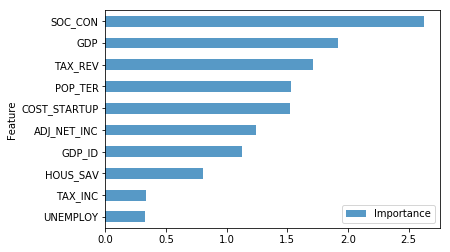

In [24]:
#Se representa la importancia de cada característica analizada

ax = permutaion_pd.plot.barh(x = 'Feature', y = 'Importance', alpha=0.75)